# **Question 2**

**Write a generalized program to implement k-means algorithm and execute the programs on the above considered datasets 10 times each with random initial cluster centres. Report the average clustering results in terms of Rand, Jaccard coefficient and also save the results of the clustering for each data point (pattern) along with its assigned cluster and for each simulations in a file. Plot the squared error loss with respect to iterations.** 

In [ ]:
from numpy.lib.function_base import i0
from numpy.linalg import norm

class Kmeans_scrach:
    '''Implementing Kmeans algo'''

    def __init__(self, n_clusters, max_iter=80, random_state=0):
        # number of clusters inputed by the user
        self.n_clusters = n_clusters 
        # number of maximum iterations upto which kmeans will run deafault value assumed is 80
        self.max_iter = max_iter
        # random state for getting the same output deafult random_state value assumed is 0
        self.random_state = random_state

    def centroids_initialization(self, data_point):
        np.random.RandomState(self.random_state)
        random_index = np.random.permutation(data_point.shape[0])
        centroids = data_point[random_index[:self.n_clusters]]
        return centroids

    def find_centroids(self, data_point, labels):
        centroids = np.zeros((self.n_clusters, data_point.shape[1]))
        for i in range(self.n_clusters):
            centroids[i, :] = np.mean(data_point[labels == i, :], axis=0)
        return centroids

    # using  euclidean distance as a distance matric
    def distance_metric(self, data_point, centroids):
        dist = np.zeros((data_point.shape[0], self.n_clusters))
        for i in range(self.n_clusters):
            row_norm = norm(data_point - centroids[i, :], axis=1)
            dist[:, i] = np.square(row_norm)
        return dist

    # finding nearest cluster from the centeroids
    def closest_cluster(self, dist):
        return np.argmin(dist, axis=1)


    # error calculations
    def SSE(self, data_point, labels, centroids):
        dist = np.zeros(data_point.shape[0])
        for i in range(self.n_clusters):
            dist[labels == i] = norm(data_point[labels == i] - centroids[i], axis=1)
        return np.sum(np.square(dist))
    
    # main algorithm of kmeans
    def fit(self, X):
        self.centroids = self.centroids_initialization(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.distance_metric(X, old_centroids)
            self.labels = self.closest_cluster(distance)
            self.centroids = self.find_centroids(X, self.labels)

            # stopping criteria stop when there is no change in the newly formed cluster centeroids
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.SSE(X, self.labels, self.centroids)
    
    def predict(self, X):
        old_centroids = self.centroids#to define old within function
        distance = self.distance_metric(X, old_centroids)
        return self.closest_cluster(distance)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
# Importing the heart disease dataset

df = pd.read_csv('https://raw.githubusercontent.com/michhottinger/CS-Data-Science-Build-Week-1/master/datasets_33180_43520_heart.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:

for col in df.columns:
  print(col,' has ',df[col].nunique(),' unique values')

age  has  41  unique values
sex  has  2  unique values
cp  has  4  unique values
trestbps  has  49  unique values
chol  has  152  unique values
fbs  has  2  unique values
restecg  has  3  unique values
thalach  has  91  unique values
exang  has  2  unique values
oldpeak  has  40  unique values
slope  has  3  unique values
ca  has  5  unique values
thal  has  4  unique values
target  has  2  unique values


**ca ,fbs , exang are ordinal variable**

In [ ]:


nominal_var=['sex','cp','restecg','slope','thal']

# One hot encoding for categorical (nominal variables)

df=pd.get_dummies(df,columns=nominal_var)
df.columns


Index(['age', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'ca',
       'target', 'sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0',
       'restecg_1', 'restecg_2', 'slope_0', 'slope_1', 'slope_2', 'thal_0',
       'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [ ]:
# removing the target variable as we have to implement clustering
df_drop = df.drop(columns = ['target'])

In [ ]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(df_drop)
X_scaled


array([[ 0.9521966 ,  0.76395577, -0.25633371, ...,  3.97911213,
        -1.10076284, -0.79311554],
       [-1.91531289, -0.09273778,  0.07219949, ..., -0.25131234,
         0.9084609 , -0.79311554],
       [-1.47415758, -0.09273778, -0.81677269, ..., -0.25131234,
         0.9084609 , -0.79311554],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , ..., -0.25131234,
        -1.10076284,  1.26085034],
       [ 0.29046364, -0.09273778, -2.2275329 , ..., -0.25131234,
        -1.10076284,  1.26085034],
       [ 0.29046364, -0.09273778, -0.19835726, ..., -0.25131234,
         0.9084609 , -0.79311554]])

In [ ]:

# Run local implementation of kmeans Here we tested 3 clusters
kmeans_model = Kmeans_scrach(n_clusters=2, max_iter=100, random_state = 42)
kmeans_model.fit(X_scaled)
centroids = kmeans_model.centroids
# labels_ are equivalent to calling fit(x) then predict
labels_ = kmeans_model.predict(X_scaled)
labels_

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
sum([1 for ele in zip(df['target'],labels_) if ele[0]==ele[1]])/len(df['target'])*100

16.831683168316832

In [ ]:
pred_labels=labels_
actual_labels=df['target']

SS=0
SD=0
DS=0
DD=0
for i in range(len(df)):
  for j in range(i+1,len(df)):
      if df['target'][i]==df['target'][j] and pred_labels[i]==pred_labels[j]:
        SS+=1
      if df['target'][i]==df['target'][j] and pred_labels[i]!=pred_labels[j]:
        SD+=1
      if df['target'][i]!=df['target'][j] and pred_labels[i]==pred_labels[j]:
        DS+=1
      if df['target'][i]!=df['target'][j] and pred_labels[i]!=pred_labels[j]:
        DD+=1

print('SS',SS)
print('SD',SD)
print('DS',DS)
print('DD',DD)


SS 16469
SD 6514
DS 6338
DD 16432


In [ ]:
Rand_index=(SS+DD)/(SS+DD+DS+SD)
jaccard_index=SS/(SS+DS+SD)
print("rand_index for the clustering is ",Rand_index)
print("jaccard_index for the clustering is ",jaccard_index)


rand_index for the clustering is  0.7191003868598781
jaccard_index for the clustering is  0.5616793424508032


## **Question 1** 
**Consider any 3 datasets (viz., iris, Breast Cancer Wisconsin (Diagnostic), Heart Disease, etc. ) with class labels from UCI machine learning repository (https://archive.ics.uci.edu/ml/index.php) . Write generalized program(s) to:**
1.   **(a)  calculate the class wise mean, standard deviations, and overall mean, standard     deviation of the data sets.**
2.    **(b) draw the boxplots of each class for each data sets.**



In [ ]:
# Importing the heart disease dataset

df = pd.read_csv('https://raw.githubusercontent.com/michhottinger/CS-Data-Science-Build-Week-1/master/datasets_33180_43520_heart.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### **Overall mean**

In [ ]:
overall_mean=[]
for col in df.columns:
  overall_mean.append(df[col].mean())

for i,col in enumerate(df.columns):
  print(col,' has mean ',overall_mean[i])

age  has mean  54.366336633663366
sex  has mean  0.6831683168316832
cp  has mean  0.966996699669967
trestbps  has mean  131.62376237623764
chol  has mean  246.26402640264027
fbs  has mean  0.1485148514851485
restecg  has mean  0.528052805280528
thalach  has mean  149.64686468646866
exang  has mean  0.32673267326732675
oldpeak  has mean  1.0396039603960396
slope  has mean  1.3993399339933994
ca  has mean  0.7293729372937293
thal  has mean  2.3135313531353137
target  has mean  0.5445544554455446


### **Class wise mean**

In [ ]:
class_wise_mean=[]
for col in df.columns:
  class_wise_mean.append(df.groupby(['target'])[col].mean())

for i,col in enumerate(df.columns):
  print(col,' has mean ',class_wise_mean[i])

age  has mean  target
0    56.601449
1    52.496970
Name: age, dtype: float64
sex  has mean  target
0    0.826087
1    0.563636
Name: sex, dtype: float64
cp  has mean  target
0    0.478261
1    1.375758
Name: cp, dtype: float64
trestbps  has mean  target
0    134.398551
1    129.303030
Name: trestbps, dtype: float64
chol  has mean  target
0    251.086957
1    242.230303
Name: chol, dtype: float64
fbs  has mean  target
0    0.159420
1    0.139394
Name: fbs, dtype: float64
restecg  has mean  target
0    0.449275
1    0.593939
Name: restecg, dtype: float64
thalach  has mean  target
0    139.101449
1    158.466667
Name: thalach, dtype: float64
exang  has mean  target
0    0.550725
1    0.139394
Name: exang, dtype: float64
oldpeak  has mean  target
0    1.585507
1    0.583030
Name: oldpeak, dtype: float64
slope  has mean  target
0    1.166667
1    1.593939
Name: slope, dtype: float64
ca  has mean  target
0    1.166667
1    0.363636
Name: ca, dtype: float64
thal  has mean  target
0    2.5434

### **Feature wise Boxplot**

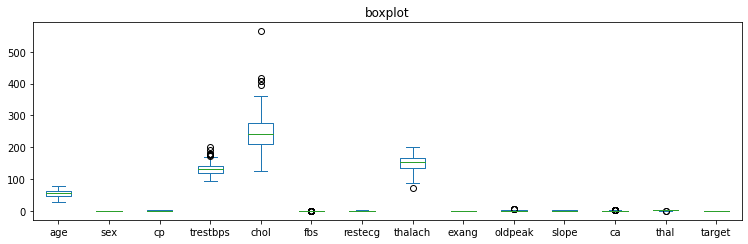

<Figure size 756x252 with 0 Axes>

In [ ]:
import seaborn as sns
# Set the figure size
plt.rcParams["figure.figsize"] = [10.50, 3.50]
plt.rcParams["figure.autolayout"] = True


ax=df.plot(kind='box', title='boxplot')
plt.show()
plt.tight_layout()

# **Question 3**

**(3) Write a generalized program to implement Fuzzy C means (FCM) algorithm and execute the programs on the above considered datasets from UCI 10 times each with random initial cluster centres. Report the average clustering results in terms of Rand, Jaccard coefficient and also save the results of the clustering and each simulations in a file.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import operator
import math
import random
import numpy as np
from scipy.linalg import norm
from scipy.spatial.distance import cdist
from collections import defaultdict
from sklearn import datasets
from sklearn.datasets import make_blobs
# ignoring warnings
import warnings
warnings.simplefilter("ignore")

In [ ]:

# Importing the heart disease dataset

df = pd.read_csv('https://raw.githubusercontent.com/michhottinger/CS-Data-Science-Build-Week-1/master/datasets_33180_43520_heart.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# defining euclidian distance formula
def euclidean_distance(d1,d2):
    distance=0
    for i in range(len(d1)):
        distance+=(d1[i]-d2[i])**2
    return distance**0.5

In [ ]:
nominal_var=['sex','cp','restecg','slope','thal']

# One hot encoding for categorical (nominal variables)

df=pd.get_dummies(df,columns=nominal_var)
df.columns

Index(['age', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'ca',
       'target', 'sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0',
       'restecg_1', 'restecg_2', 'slope_0', 'slope_1', 'slope_2', 'thal_0',
       'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [ ]:
# removing the target variable as we have to implement clustering
df_drop = df.drop(columns = ['target'])

In [ ]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(df_drop)
X_scaled


array([[ 0.9521966 ,  0.76395577, -0.25633371, ...,  3.97911213,
        -1.10076284, -0.79311554],
       [-1.91531289, -0.09273778,  0.07219949, ..., -0.25131234,
         0.9084609 , -0.79311554],
       [-1.47415758, -0.09273778, -0.81677269, ..., -0.25131234,
         0.9084609 , -0.79311554],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , ..., -0.25131234,
        -1.10076284,  1.26085034],
       [ 0.29046364, -0.09273778, -2.2275329 , ..., -0.25131234,
        -1.10076284,  1.26085034],
       [ 0.29046364, -0.09273778, -0.19835726, ..., -0.25131234,
         0.9084609 , -0.79311554]])

In [ ]:
y=df['target']

In [ ]:
# utility valuues 
m=2
n=X_scaled.shape[0]
c=3
p=X_scaled.shape[1]
max_iter=100

In [ ]:
def initialize_membership_matrix(n,c):
    member_matrics=list()
    for i in range(n):
        # this generates the list of numbers between 0 and 1
        ran_list=[random.random() for x in range(c)] 
        # taking the sum of all random values
        total=sum(ran_list)
        for i in range(len(ran_list)):
            ran_list[i]=ran_list[i]/total
        member_matrics.append(ran_list)
    return member_matrics

def update_centroid(member_matrics,data):
    centroids={}

    for j in range(c):
        temp=[]
        for k in range(p):
            
            add=0
            for i in range(n):
                add+=member_matrics[i][j]**m
            x=0
            for i in range(n):
                x+=(member_matrics[i][j]**m)*(data[i][k])
            val=x/add
            temp.append(val)
        centroids[j]=temp
    return centroids


def update_membership_matrix(member_matrics,centroids,data):
    ratio=float(2/(m-1))

    for i in range(n):
        distances=list()
        for j in range(c):
            distances.append(euclidean_distance(data[i],centroids[j]))
        for j in range(c):
            den = sum([math.pow(float(distances[j]/distances[q]), ratio) for q in range(c)])
            member_matrics[i][j] = float(1/den) 
           
            
    return member_matrics
        
                
    
def find_cluster(member_mat):
    clusters=list()
    for i in range(n):
        max_val, idx = max((val, idx) for (idx, val) in enumerate(member_mat[i]))
        clusters.append(idx)
    return clusters

def check(old_member_matrics,member_matrics):
    diff=0
    for i in range(n):
        for j in range(c):
            diff+=old_member_matrics[i][j]-member_matrics[i][j]
    if(diff<0.01):
        return True
    return False

def fuzzy_c_mean(data):
    
    member_matrics=initialize_membership_matrix(n,c)
    for i in range(max_iter):
        centroids=update_centroid(member_matrics,data)
        old_member_matrics=member_matrics
        member_matrics=update_membership_matrix(member_matrics,centroids,data)
        cluster=find_cluster(member_matrics)
        if(check(old_member_matrics,member_matrics))<0.01:
            print(i)
            break
    
   
    
    return cluster,centroids

In [ ]:
clusters,centroids=fuzzy_c_mean(X_scaled)
print("Final Centroid points are:")
print(centroids)

Final Centroid points are:
{0: [6.763497813198265e-10, 2.6524825335799755e-10, 1.2751060171819873e-10, 8.532150461384101e-11, -1.1522019226778588e-09, 1.0994595466122133e-09, 1.0454424509426468e-09, 7.244725645167285e-10, -6.668722769353216e-10, 6.668721878976334e-10, 1.1649345342613104e-09, -7.324178286011015e-10, -6.999205056960316e-10, 2.6353931415893677e-11, 5.65686569010872e-10, -5.749587061127717e-10, 4.169906417258677e-11, 1.337707378988579e-10, 1.198799682573905e-09, -1.2657811182422794e-09, 7.712759577779155e-12, 2.343170594864664e-10, -1.3994169236469037e-09, 1.3155307537638078e-09], 1: [-1.155861141965924e-09, -4.533032158986268e-10, -2.1791212292295013e-10, -1.4581191037692851e-10, 1.9690763830610716e-09, -1.87894345967363e-09, -1.7866297254740797e-09, -1.2381018940116324e-09, 1.139664417107912e-09, -1.139664584465789e-09, -1.990838062562142e-09, 1.2516799393600357e-09, 1.1961428887506665e-09, -4.503818480794197e-11, -9.667412755710471e-10, 9.825873533187584e-10, -7.1262551

In [ ]:
pred_labels=clusters
actual_labels=df['target']

SS=0
SD=0
DS=0
DD=0
for i in range(len(df)):
  for j in range(i+1,len(df)):
      if df['target'][i]==df['target'][j] and pred_labels[i]==pred_labels[j]:
        SS+=1
      if df['target'][i]==df['target'][j] and pred_labels[i]!=pred_labels[j]:
        SD+=1
      if df['target'][i]!=df['target'][j] and pred_labels[i]==pred_labels[j]:
        DS+=1
      if df['target'][i]!=df['target'][j] and pred_labels[i]!=pred_labels[j]:
        DD+=1

print('SS',SS)
print('SD',SD)
print('DS',DS)
print('DD',DD)
Rand_index=(SS+DD)/(SS+DD+DS+SD)
jaccard_index=SS/(SS+DS+SD)
print("rand_index for the clustering is ",Rand_index)
print("jaccard_index for the clustering is ",jaccard_index)


SS 16669
SD 6314
DS 6132
DD 16638
rand_index for the clustering is  0.7279741219155028
jaccard_index for the clustering is  0.5725227545938519


# **Question 4 )   KNN Implmentation**

In [8]:
from sklearn import datasets
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
  
data=pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
data.head(4)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


In [10]:
feature_columns = ['sepal_length', 'sepal_width', 'petal_length','petal_width']
X = data[feature_columns].values
y = data['species'].values

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [14]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [15]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


### **Applying cross validation**

In [16]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())


<Figure size 432x288 with 0 Axes>

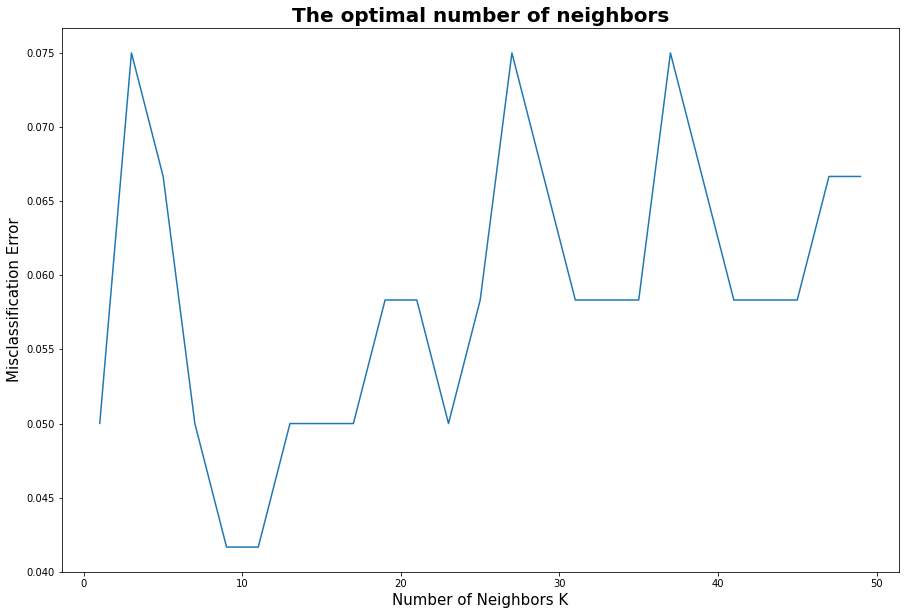

In [18]:
# changing to misclassification error
import seaborn as sns
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [19]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 9.


# Question5) **Association rules implimentation**

In [ ]:
!pip install apyori

In [ ]:
import numpy as np # linear algebra
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/vaibhav251999/Projects/main/Market_Basket_Optimisation.csv")
df.head()

In [ ]:
df.info()

In [24]:
transactions = []
for i in range(0, 5000):
  transactions.append([str(df.values[i,j]) for j in range(0, 20)])

In [26]:
from apyori import apriori
rules = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)

In [27]:
results = list(rules)
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])
print(resultsinDataFrame)


          Left Hand Side    Right Hand Side  Support  Confidence      Lift
0                almonds            burgers   0.0060    0.291262  3.332519
1            blueberries        ground beef   0.0032    0.326531  3.176368
2            light cream            chicken   0.0046    0.287500  4.592652
3            light cream        cooking oil   0.0036    0.225000  3.919861
4   mushroom cream sauce           escalope   0.0058    0.305263  3.740970
5                  pasta           escalope   0.0048    0.307692  3.770739
6   extra dark chocolate          olive oil   0.0030    0.245902  3.563792
7             fresh tuna              honey   0.0046    0.201754  4.185776
8          fromage blanc              honey   0.0034    0.257576  5.343895
9        parmesan cheese  frozen vegetables   0.0058    0.362500  3.791841
10         herb & pepper        ground beef   0.0152    0.323404  3.145956
11           light cream      herb & pepper   0.0032    0.200000  4.255319
12           light cream 

In [28]:
resultsinDataFrame.nlargest(n = 10, columns = 'Lift')

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
8,fromage blanc,honey,0.0034,0.257576,5.343895
2,light cream,chicken,0.0046,0.287500,4.592652
14,pasta,shrimp,0.0050,0.320513,4.426973
11,light cream,herb & pepper,0.0032,0.200000,4.255319
7,fresh tuna,honey,0.0046,0.201754,4.185776
13,whole wheat pasta,olive oil,0.0072,0.285714,4.140787
3,light cream,cooking oil,0.0036,0.225000,3.919861
9,parmesan cheese,frozen vegetables,0.0058,0.362500,3.791841
5,pasta,escalope,0.0048,0.307692,3.770739
4,mushroom cream sauce,escalope,0.0058,0.305263,3.740970


# **Question 6)  Heirarichal Clustering implimentation**

In [29]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('https://raw.githubusercontent.com/vaibhav251999/Projects/main/Wholesale%20customers%20data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [30]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


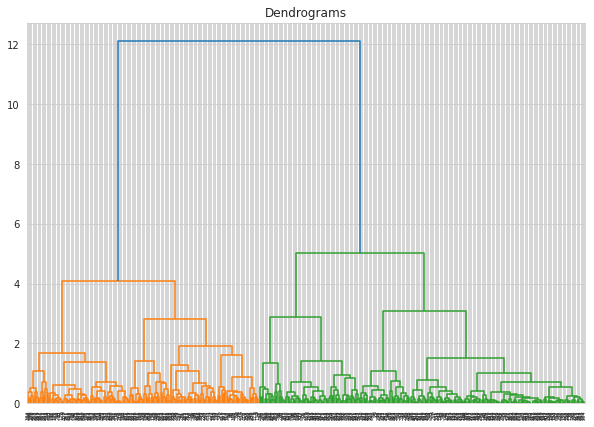

In [31]:

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

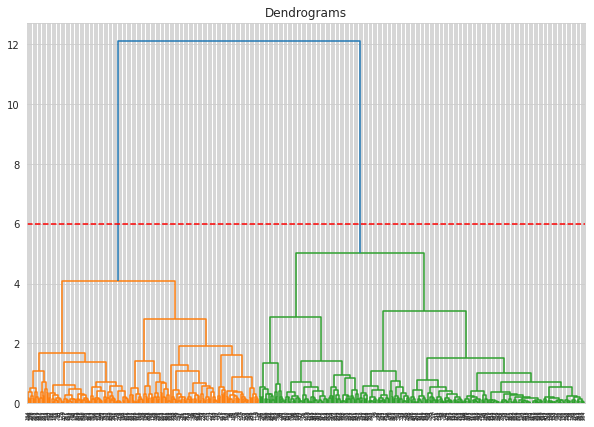

In [32]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [33]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

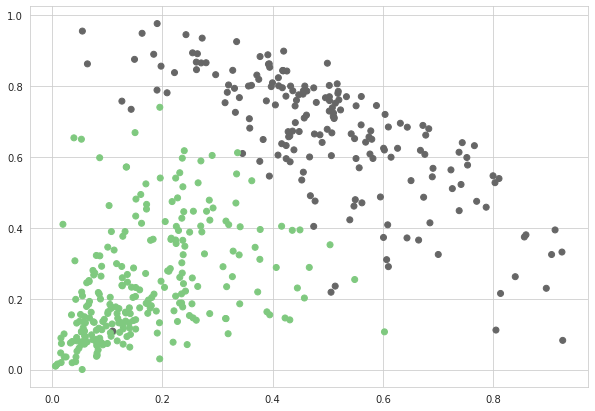

In [37]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_,cmap='Accent')

# **Question 8) DBSCAN Implimentation**

In [41]:

import numpy as np
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/DBSCAN-Algorithm/master/Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values


# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=3,min_samples=4)

# Fitting the model

model=dbscan.fit(X)

labels=model.labels_


from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(labels,dtype=bool)

sample_cores[dbscan.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(labels))- (1 if -1 in labels else 0)


print('Number of Cluesters using DBSCAN is ',n_clusters)

Number of Cluesters using DBSCAN is  9


In [40]:

print(metrics.silhouette_score(X,labels))

-0.1908319132560097
